<div style="text-align: center;">
    <h2 style="font-size: 36px; font-weight: bold; color: #2E8B57;">Heart Disease</h2>
    <p style="font-size: 22px;">
        <a href="https://github.com/codewithdark-git" 
           style="text-decoration: none; color:rgb(73, 128, 6); transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#0077B5';" 
           onmouseout="this.style.color='rgb(73, 128, 6)';">
            GitHub
        </a> | 
        <a href="https://www.linkedin.com/in/codewithdark" 
           style="text-decoration: none; color: #0077B5; transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#333';" 
           onmouseout="this.style.color='#0077B5';">
            LinkedIn
        </a> | 
        <a href="https://www.kaggle.com/codewithdark" 
           style="text-decoration: none; color: #00A859; transition: color 0.3s ease-in-out;" 
           onmouseover="this.style.color='#333';" 
           onmouseout="this.style.color='#00A859';">
            Kaggle
        </a>
    </p>
</div>


<hr style="border-top: 2px solid #2E8B57; margin: 20px 0;">

**Author:** [Ahsan Umar](https://www.linkedin.com/in/codewithdark)

**Date:** 2024-12-29

**Description:**  
This project leverages advanced machine learning techniques to predict the likelihood of heart disease using the Heart Disease dataset from [Kaggle](https://www.kaggle.com/datasets/iammustafatz/heart-disease-prediction-dataset). By analyzing key health indicators and optimizing predictive models, this initiative aims to deliver a robust solution for early detection and risk assessment.

---

### Objectives:
* Explore and preprocess the dataset.
* Develop a machine learning model to predict diabetes.
* Evaluate the model's performance.

### Technologies Used:
* **Python 3.x**
* **Pandas** for data manipulation
* **NumPy** for numerical operations
* **Scikit-learn** for machine learning
* **Matplotlib** and **Seaborn** for visualization


# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate,  cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
from time import time
from sklearn.metrics import roc_auc_score, make_scorer
import warnings
warnings.filterwarnings("ignore")

# 2. Load the dataset

In [2]:
#!/bin/bash
!kaggle datasets download johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown




  0%|          | 0.00/6.18k [00:00<?, ?B/s]
100%|##########| 6.18k/6.18k [00:00<00:00, 2.26MB/s]


In [6]:
import zipfile
import os

# Specify the path to the zip file
zip_file_path = 'data/heart-disease-dataset.zip'
extract_to_path = 'data/.'

# Create the directory if it doesn't exist
os.makedirs(extract_to_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Files extracted to {extract_to_path}")

Files extracted to data/.


In [3]:
data = pd.read_csv('data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Describe the dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
data["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

 ### Our data is balanced


### Check the correlation between features

In [8]:
data[data.columns[1:]].corr()['target'][:-1]

sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
Name: target, dtype: float64

In [9]:
# Checking for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# 3. Exploratory Data Analysis

## 3.1 Data Distribution

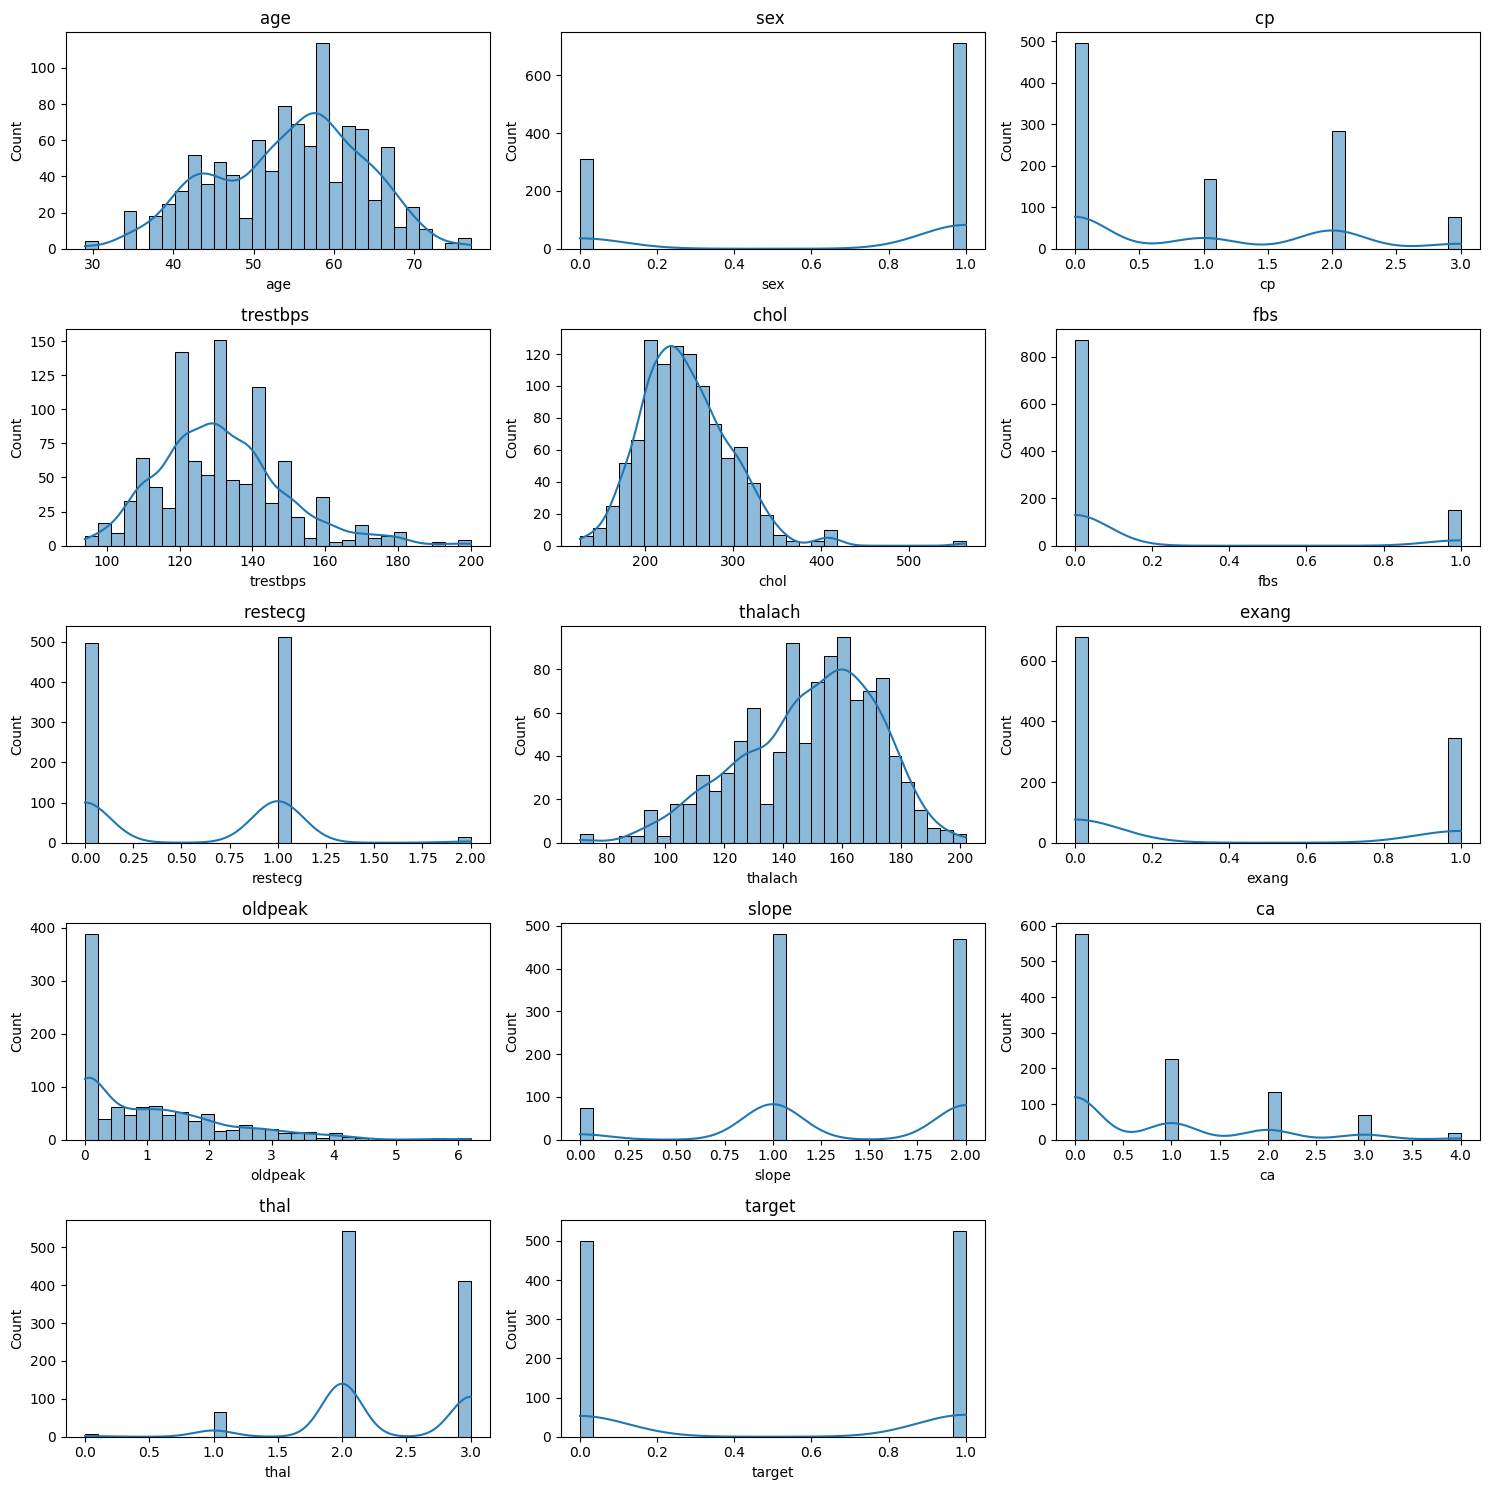

In [10]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=data, x=feature, bins=30, kde=True)
    plt.title(f'{feature} ')
plt.tight_layout()

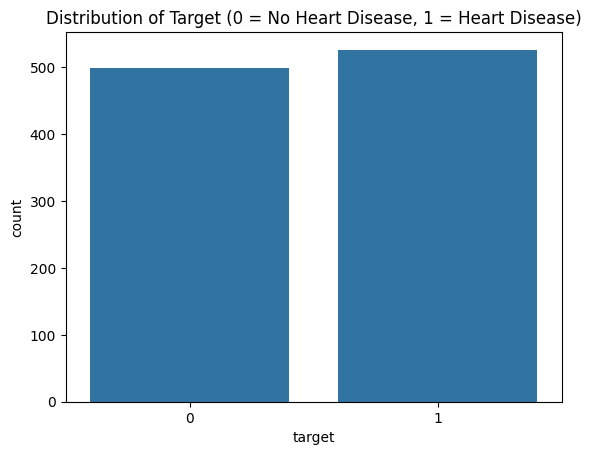

In [11]:
# Plot Target variable distribution
sns.countplot(x='target', data=data)
plt.title('Distribution of Target (0 = No Heart Disease, 1 = Heart Disease)')
plt.show()

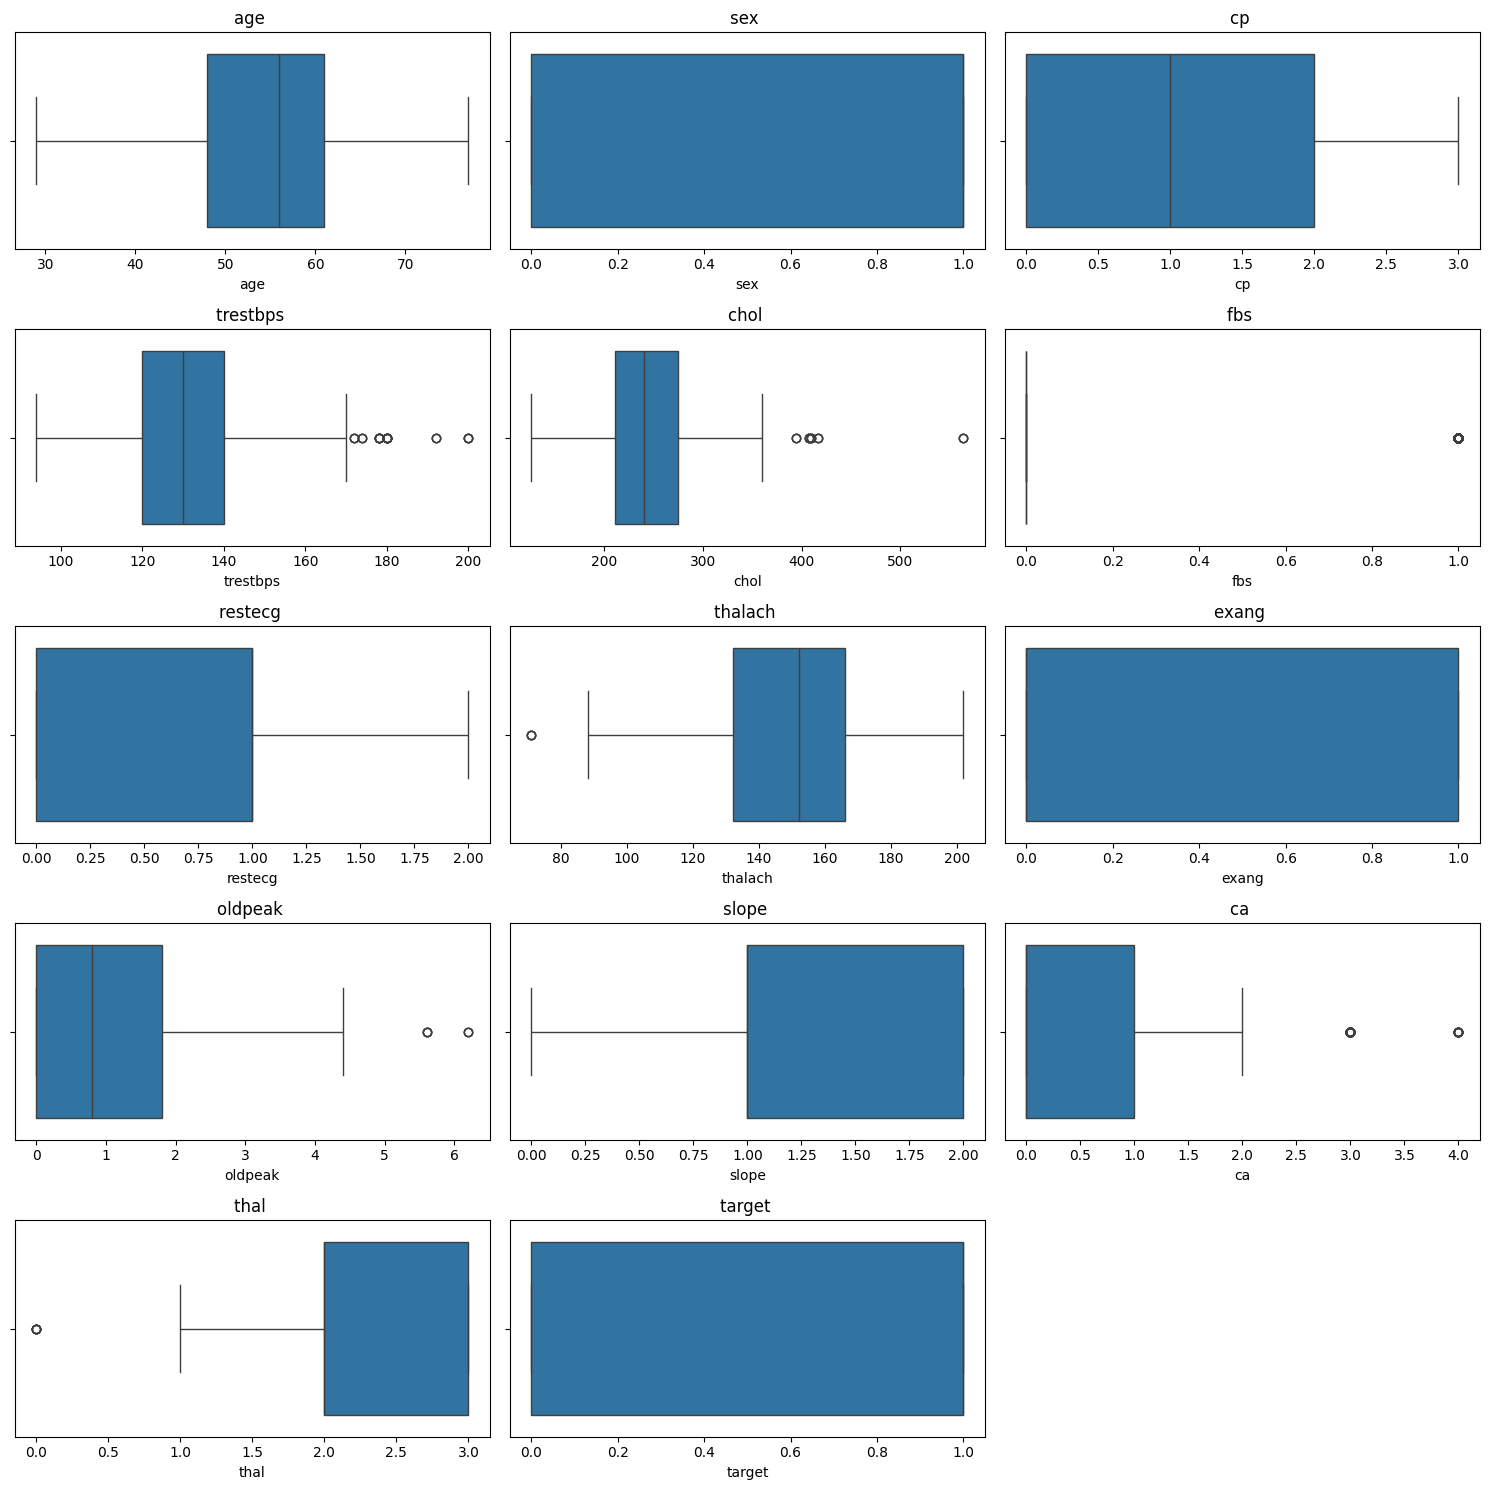

In [12]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=data, x=feature)
    plt.title(f'{feature} ')
plt.tight_layout()

## 3.2 Number of people who have heart attack vs age

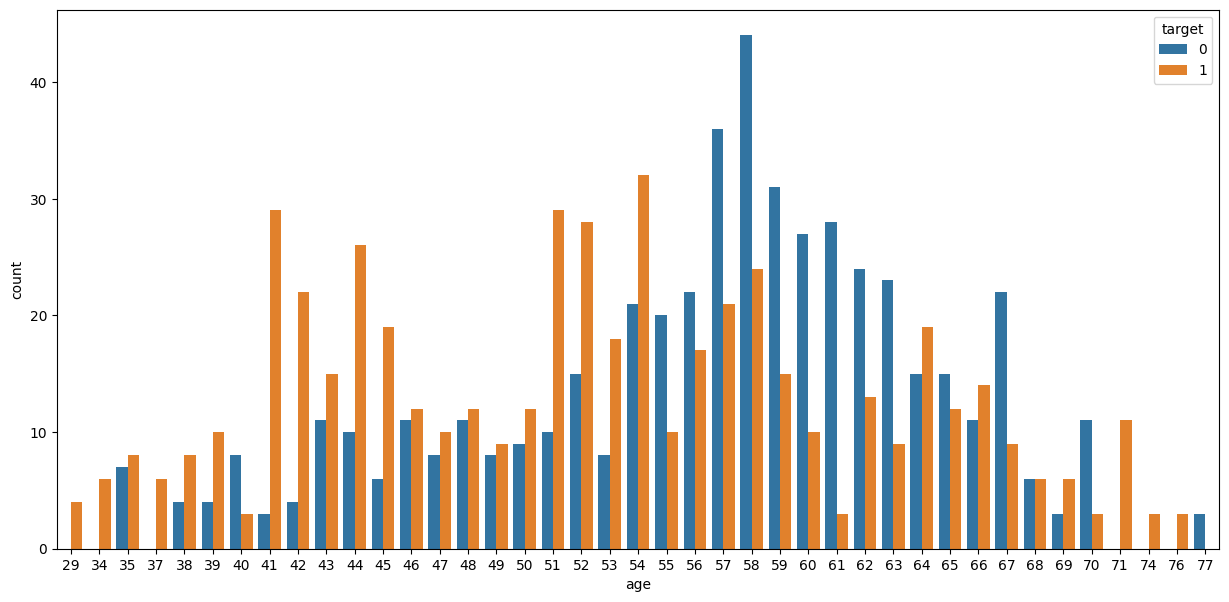

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(x ='age',data = data, hue = 'target')
plt.show()

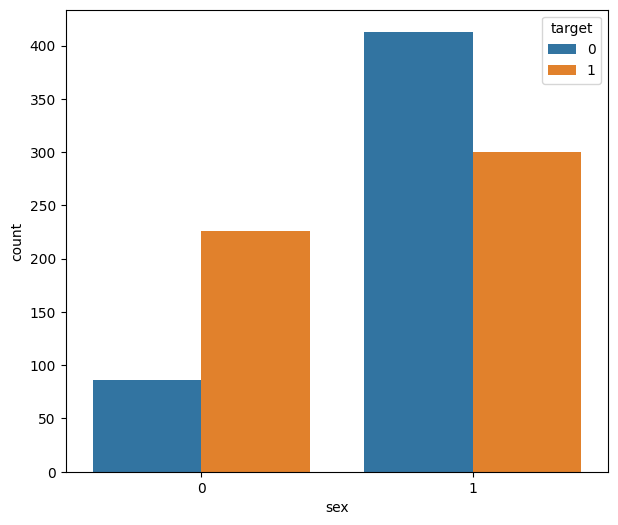

In [14]:
plt.figure(figsize=(7,6))
sns.countplot(x='sex',hue='target',data=data)
plt.show()

## 3.3 Correlation Heat map

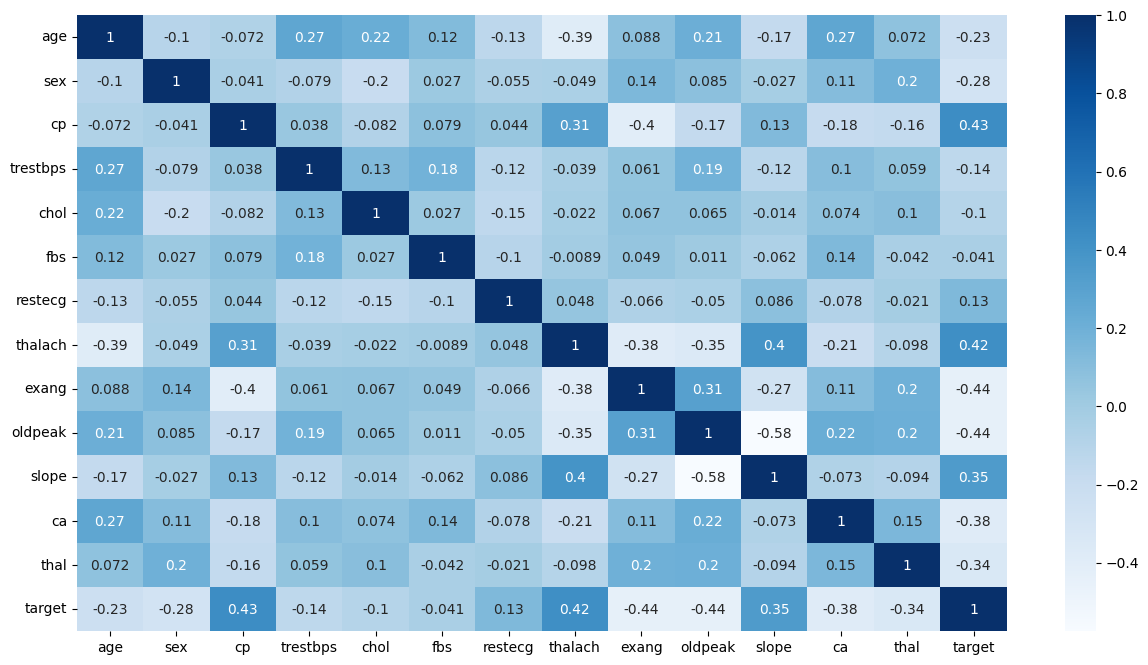

In [15]:
# Plot correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True, cmap="Blues")
plt.show()

# 4. Splitting data to Training and Testing set

In [16]:
X = data.drop('target', axis=True)
y = data['target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Normalization

In [18]:
# Standardize the feature set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 6. Models

In [19]:
from lazypredict.Supervised import LazyClassifier

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

 ... (more hidden) ...

[LightGBM] [Info] Number of positive: 377, number of negative: 340
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 358
[LightGBM] [Info] Number of data points in the train set: 717, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.525802 -> initscore=0.103300
[LightGBM] [Info] Start training from score 0.103300
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [20]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.99,0.99,0.99,0.99,0.36
LabelPropagation,0.99,0.99,0.99,0.99,0.12
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.36
LabelSpreading,0.99,0.99,0.99,0.99,0.10
XGBClassifier,0.98,0.98,0.98,0.98,0.24
RandomForestClassifier,0.98,0.98,0.98,0.98,0.62
ExtraTreeClassifier,0.98,0.98,0.98,0.98,0.04
BaggingClassifier,0.98,0.98,0.98,0.98,0.13
DecisionTreeClassifier,0.97,0.97,0.97,0.97,0.04


In [21]:
import pandas as pd

def print_model_results(grid_search, best_model, f1, con_mat, accuracy, pre_scr, rec_scr):
    """
    Print the results of the model training in a structured and readable format.
    """
    print(f"--- {best_model.__class__.__name__} Evaluation ---")
    print(f"\nBest Hyperparameters: {grid_search.best_params_}")
    
    print("\nPerformance Metrics:")
    print(f"  - F1 Score: {f1:.4f}")
    print(f"  - Accuracy: {accuracy:.4f}")
    print(f"  - Precision: {pre_scr:.4f}")
    print(f"  - Recall: {rec_scr:.4f}")

    # Confusion matrix
    print("\nConfusion Matrix (Predicted vs Actual):")
    con_mat_df = pd.DataFrame(con_mat, index=["Actual Negative", "Actual Positive"], 
                              columns=["Predicted Negative", "Predicted Positive"])
    print(con_mat_df)

    print("\n--------------------------------------------")


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, precision_score, recall_score

def train_model(model, param_grid, train_data, test_data, train_target, test_target):
    """
    Train the specified model using GridSearchCV on the training data and evaluate it on the test data.
    
    Parameters:
    model: The machine learning model to train.
    param_grid (dict): The hyperparameter grid for GridSearchCV.
    train_data (pd.DataFrame): The input features for training.
    test_data (pd.DataFrame): The input features for testing.
    train_target (pd.Series): The target labels for training.
    test_target (pd.Series): The target labels for testing.
    
    Returns:
    dict: A dictionary containing the best model, its name, and evaluation metrics.
    """
    # Perform GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(train_data, train_target)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    preds = best_model.predict(test_data)

    # Calculate evaluation metrics
    f1 = f1_score(test_target, preds, average='weighted')  # Use `weighted` for multiclass problems
    con_mat = confusion_matrix(test_target, preds)
    accuracy = accuracy_score(test_target, preds)
    pre_scr = precision_score(test_target, preds, average='weighted')
    rec_scr = recall_score(test_target, preds, average='weighted')

    # Print the best parameters and model evaluation
    print_model_results(grid_search, best_model, f1, con_mat, accuracy, pre_scr, rec_scr)


    # Return the results in a dictionary
    return {
        "best_model": best_model,
        "best_params": grid_search.best_params_,
        "f1_score": f1,
        "confusion_matrix": con_mat,
        "accuracy": accuracy,
        "precision": pre_scr,
        "recall": rec_scr
    } 


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

# Define the models to evaluate
models = [
    LogisticRegression(max_iter=1000),  # Increased max_iter for convergence
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# Example parameter grid for models (this can be adjusted per model)
param_grids = {
    LogisticRegression: {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']},
    DecisionTreeClassifier: {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 8]},
    RandomForestClassifier: {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    SVC: {'C': [0.5 ,1, 2], 'kernel': ['linear', 'rbf']}
}


In [24]:
model_accuracies = {}

# Loop through models
for model in models:
    print(f"Training {model.__class__.__name__}...")
    param_grid = param_grids.get(model.__class__, {})
    results = train_model(model, param_grid, X_train, X_test, y_train, y_test)
    model_accuracies[model.__class__.__name__] = results

    
    # Save the trained model to a pickle file
    model_filename = f"Models/{model.__class__.__name__}_model.pkl"
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)  # Save the model to the pickle file
    
    print(f"Model saved as {model_filename}")

Training LogisticRegression...
--- LogisticRegression Evaluation ---

Best Hyperparameters: {'C': 1, 'solver': 'liblinear'}

Performance Metrics:
  - F1 Score: 0.8048
  - Accuracy: 0.8052
  - Precision: 0.8112
  - Recall: 0.8052

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative                 119                  40
Actual Positive                  20                 129

--------------------------------------------
Model saved as Models/LogisticRegression_model.pkl
Training DecisionTreeClassifier...
--- DecisionTreeClassifier Evaluation ---

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2}

Performance Metrics:
  - F1 Score: 0.9707
  - Accuracy: 0.9708
  - Precision: 0.9723
  - Recall: 0.9708

Confusion Matrix (Predicted vs Actual):
                 Predicted Negative  Predicted Positive
Actual Negative                 159                   0
Actual Positive                   9                 140

--------

In [25]:
# Print the accuracies of all models
print("\nModel Accuracies:")
for model_name, accuracy in model_accuracies.items():
    print(f"{20*'=='} \n")
    print(f"{model_name}: {accuracy} \n")


Model Accuracies:

LogisticRegression: {'best_model': LogisticRegression(C=1, max_iter=1000, solver='liblinear'), 'best_params': {'C': 1, 'solver': 'liblinear'}, 'f1_score': 0.8047836676429813, 'confusion_matrix': array([[119,  40],
       [ 20, 129]], dtype=int64), 'accuracy': 0.8051948051948052, 'precision': 0.8112208765224814, 'recall': 0.8051948051948052} 


DecisionTreeClassifier: {'best_model': DecisionTreeClassifier(max_depth=20), 'best_params': {'max_depth': 20, 'min_samples_split': 2}, 'f1_score': 0.9707263467620282, 'confusion_matrix': array([[159,   0],
       [  9, 140]], dtype=int64), 'accuracy': 0.9707792207792207, 'precision': 0.9723446196660483, 'recall': 0.9707792207792207} 


RandomForestClassifier: {'best_model': RandomForestClassifier(), 'best_params': {'max_depth': None, 'n_estimators': 100}, 'f1_score': 0.9902557287477293, 'confusion_matrix': array([[159,   0],
       [  3, 146]], dtype=int64), 'accuracy': 0.9902597402597403, 'precision': 0.9904401154401155, 'rec

In [26]:
preformance_accuracy = pd.DataFrame(model_accuracies)

In [27]:
preformance_accuracy

,LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,SVC
best_model,"LogisticRegression(C=1, max_iter=1000, solver=...",DecisionTreeClassifier(max_depth=20),"(DecisionTreeClassifier(max_features='sqrt', r...",SVC(C=2)
best_params,"{'C': 1, 'solver': 'liblinear'}","{'max_depth': 20, 'min_samples_split': 2}","{'max_depth': None, 'n_estimators': 100}","{'C': 2, 'kernel': 'rbf'}"
f1_score,0.80,0.97,0.99,0.93
confusion_matrix,"[[119, 40], [20, 129]]","[[159, 0], [9, 140]]","[[159, 0], [3, 146]]","[[143, 16], [5, 144]]"
accuracy,0.81,0.97,0.99,0.93
precision,0.81,0.97,0.99,0.93
recall,0.81,0.97,0.99,0.93


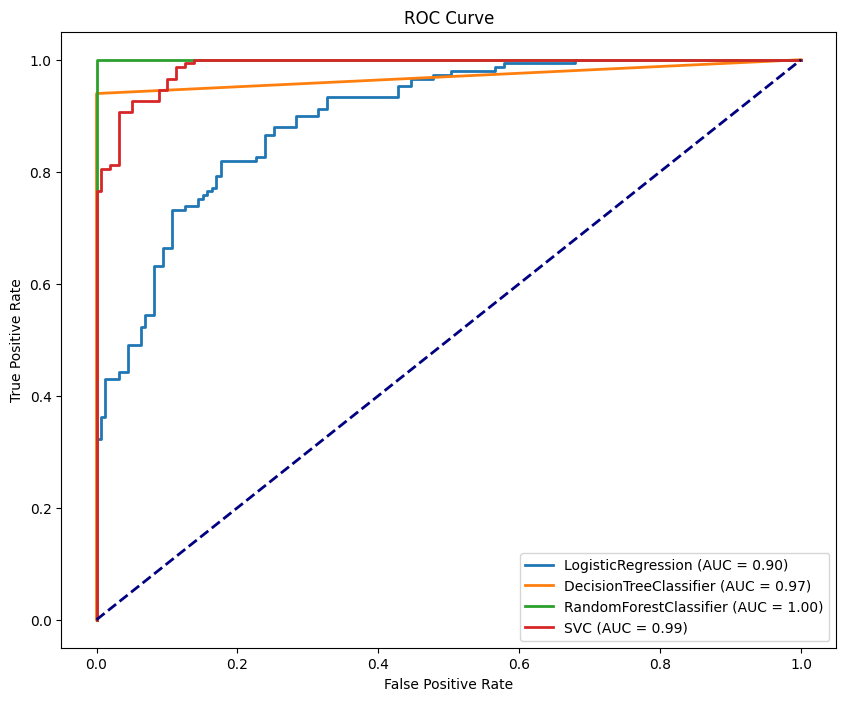

In [28]:
plt.figure(figsize=(10, 8))
for model_name, details in model_accuracies.items():
    model = details['best_model']
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
    elif hasattr(model, "decision_function"):  # Handle models like SVM without predict_proba
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to 0-1
    else:
        print(f"{model_name} does not support predict_proba or decision_function, skipping.")
        continue

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



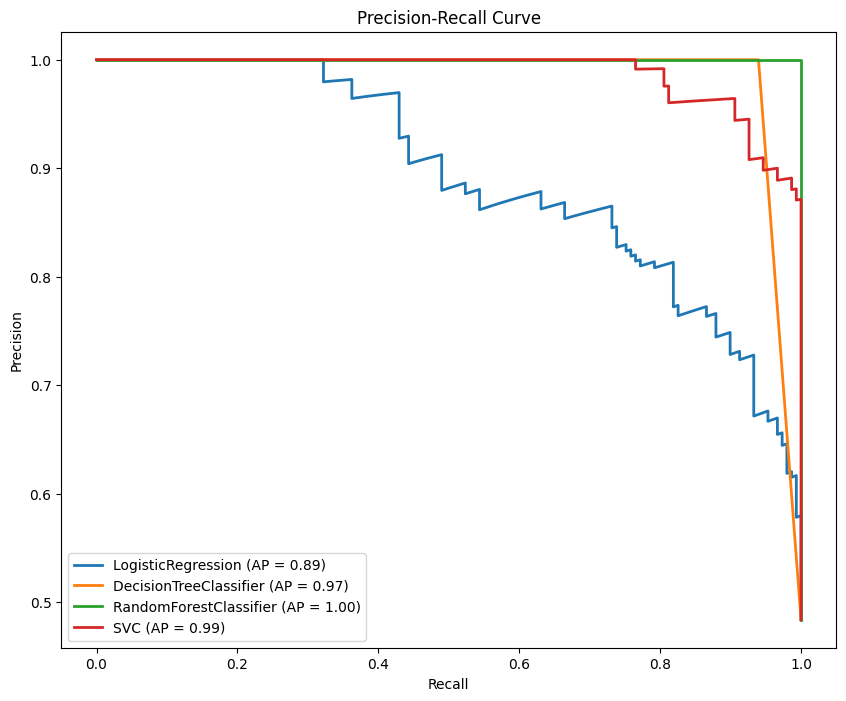

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(10, 8))

for model_name, details in model_accuracies.items():
    model = details['best_model']
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities
    elif hasattr(model, "decision_function"):  # Handle models like SVM
        y_prob = model.decision_function(X_test)
        y_prob = (y_prob - y_prob.min()) / (y_prob.max() - y_prob.min())  # Normalize to 0-1
    else:
        print(f"{model_name} does not support predict_proba or decision_function, skipping.")
        continue
    
    # Compute Precision-Recall values
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    
    # Plot Precision-Recall curve
    plt.plot(recall, precision, lw=2, label=f'{model_name} (AP = {avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


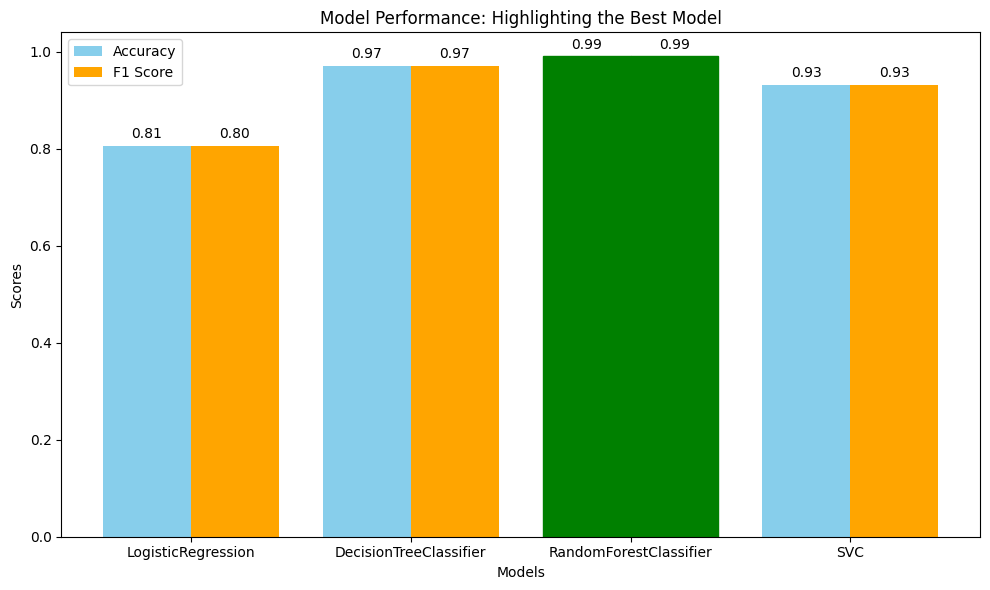

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Extract model names and metrics from `model_accuracies`
model_names = list(model_accuracies.keys())
accuracies = [details['accuracy'] for details in model_accuracies.values()]
f1_scores = [details['f1_score'] for details in model_accuracies.values()]

# Identify the best model (e.g., based on accuracy or F1 score)
best_model_index = np.argmax(accuracies)  # Change this to F1 score if needed
best_model_name = model_names[best_model_index]

# Plot the metrics
x = np.arange(len(model_names))  # Model indices for the x-axis
width = 0.4  # Bar width

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x - width/2, accuracies, width, label='Accuracy', color='skyblue')
bars2 = plt.bar(x + width/2, f1_scores, width, label='F1 Score', color='orange')

# Highlight the best model
bars1[best_model_index].set_color('green')
bars2[best_model_index].set_color('green')

# Add annotations
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{bar.get_height():.2f}', ha='center', va='bottom')
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{bar.get_height():.2f}', ha='center', va='bottom')

# Labels, legend, and title
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance: Highlighting the Best Model')
plt.xticks(x, model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


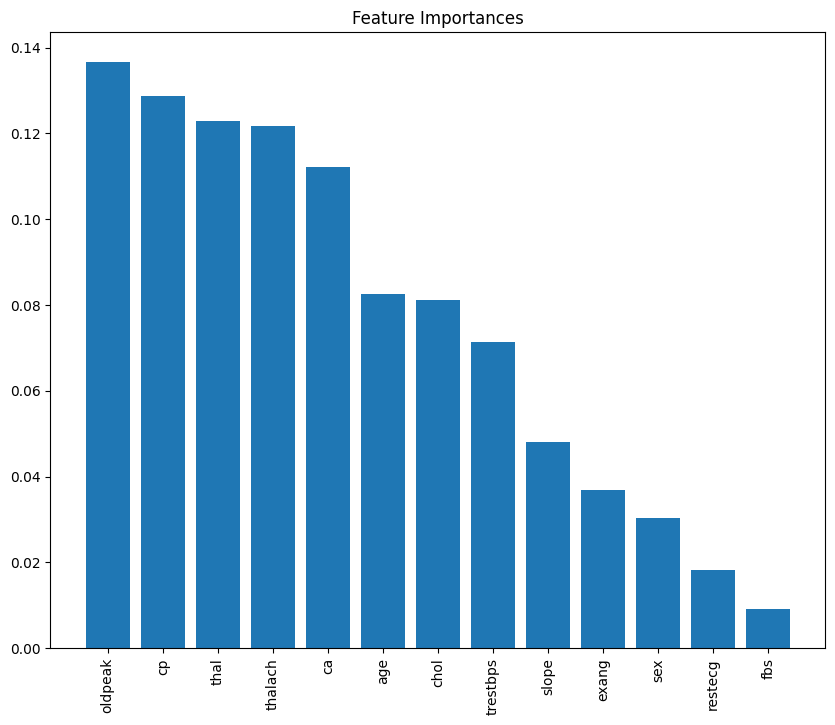

In [31]:
# Plot the feature importance for the best model
best_model = model_accuracies['RandomForestClassifier']['best_model']
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=90)

plt.show()